<a href="https://colab.research.google.com/github/NguyenKimLong-20146222/Homework_Week5_FuzzyLogic/blob/main/Rainfall_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EXERCISE 1: RAINFALL, WINDSPEED AND TEMPERATURE

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


6.408946238085342


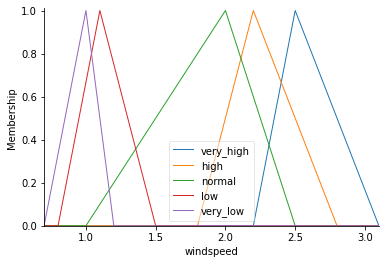

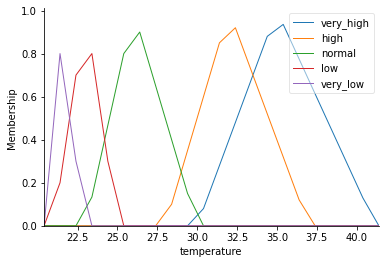

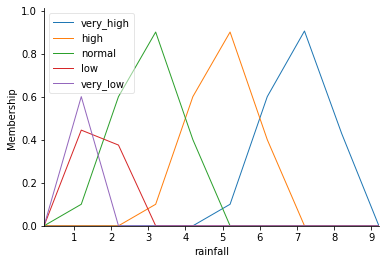

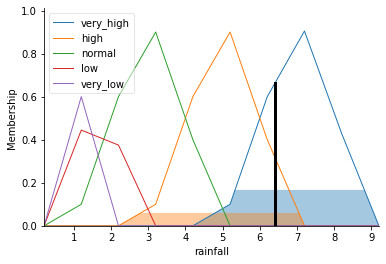

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
windspeed = ctrl.Antecedent(np.arange(0.7,3.2,0.1),"windspeed")
temperature = ctrl.Antecedent(np.arange(20.4,41.5,1),"temperature")
rainfall = ctrl.Consequent(np.arange(0.2,9.5,1),"rainfall")

windspeed["very_high"] = fuzz.trimf(windspeed.universe,[2.2,2.5,3.1])
windspeed["high"] = fuzz.trimf(windspeed.universe,[1.8,2.2,2.8])
windspeed["normal"] = fuzz.trimf(windspeed.universe,[1,2,2.5])
windspeed["low"] = fuzz.trimf(windspeed.universe,[0.8,1.1,1.5])
windspeed["very_low"] = fuzz.trimf(windspeed.universe,[0.7,1,1.2])

temperature["very_high"] = fuzz.trimf(temperature.universe,[30,35,41.2])
temperature["high"] = fuzz.trimf(temperature.universe,[28,32,37])
temperature["normal"] = fuzz.trimf(temperature.universe,[23,26,30])
temperature["low"] = fuzz.trimf(temperature.universe,[21,23,25])
temperature["very_low"] = fuzz.trimf(temperature.universe,[20.4,21,23])

rainfall["very_high"] = fuzz.trimf(rainfall.universe,[5,7,9.1])
rainfall["high"] = fuzz.trimf(rainfall.universe,[3,5,7])
rainfall["normal"] = fuzz.trimf(rainfall.universe,[1,3,5])
rainfall["low"] = fuzz.trimf(rainfall.universe,[0.8,1.7,2.5])
rainfall["very_low"] = fuzz.trimf(rainfall.universe,[0.2,1,1.5])

windspeed.view()
temperature.view()
rainfall.view()

rule1 = ctrl.Rule(windspeed["very_high"] & temperature["very_high"], rainfall["very_high"])
rule2 = ctrl.Rule(windspeed["very_high"] & temperature["high"], rainfall["very_high"])
rule3 = ctrl.Rule(windspeed["very_high"] & temperature["normal"], rainfall["high"])
rule4 = ctrl.Rule(windspeed["very_high"] & temperature["low"], rainfall["high"])
rule5 = ctrl.Rule(windspeed["very_high"] & temperature["very_low"], rainfall["normal"])

rule6 = ctrl.Rule(windspeed["high"] & temperature["very_high"], rainfall["very_high"])
rule7 = ctrl.Rule(windspeed["high"] & temperature["high"], rainfall["very_high"])
rule8 = ctrl.Rule(windspeed["high"] & temperature["normal"], rainfall["high"])
rule9 = ctrl.Rule(windspeed["high"] & temperature["low"], rainfall["normal"])
rule10 = ctrl.Rule(windspeed["high"] & temperature["very_low"], rainfall["normal"])

rule11 = ctrl.Rule(windspeed["normal"] & temperature["very_high"], rainfall["high"])
rule12 = ctrl.Rule(windspeed["normal"] & temperature["high"], rainfall["high"])
rule13 = ctrl.Rule(windspeed["normal"] & temperature["normal"], rainfall["normal"])
rule14 = ctrl.Rule(windspeed["normal"] & temperature["low"], rainfall["normal"])
rule15 = ctrl.Rule(windspeed["normal"] & temperature["very_low"], rainfall["low"])

rule16 = ctrl.Rule(windspeed["low"] & temperature["very_high"], rainfall["high"])
rule17 = ctrl.Rule(windspeed["low"] & temperature["high"], rainfall["normal"])
rule18 = ctrl.Rule(windspeed["low"] & temperature["normal"], rainfall["normal"])
rule19 = ctrl.Rule(windspeed["low"] & temperature["low"], rainfall["low"])
rule20 = ctrl.Rule(windspeed["low"] & temperature["very_low"], rainfall["very_low"])

rule21 = ctrl.Rule(windspeed["very_low"] & temperature["very_high"], rainfall["normal"])
rule22 = ctrl.Rule(windspeed["very_low"] & temperature["high"], rainfall["normal"])
rule23 = ctrl.Rule(windspeed["very_low"] & temperature["normal"], rainfall["low"])
rule24 = ctrl.Rule(windspeed["very_low"] & temperature["low"], rainfall["very_low"])
rule25 = ctrl.Rule(windspeed["very_low"] & temperature["very_low"], rainfall["very_low"])

rainfalling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,
                                       rule21,rule22,rule23,rule24,rule25])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input["temperature"]=30
rainfalling.input["windspeed"]=3
rainfalling.compute()
print(rainfalling.output["rainfall"])
rainfall.view (sim = rainfalling)

